## Haas x Modules Teaming (SU21)
 Last Updated: 06/20/2021
 
 *Edited By: Alex Cui, Carlos Calderon, Jacob Yim, Paul Terrell-Perica*

### Objectives of this Notebook

- Show existing data format as well as the joined data (joined both numerically and textually)
- Illustrate data with simple visualizations
- Introduce and contextualize Voila, a dashboarding package
- ...

### I. Raw Data
- Import the raw excel data file of survey responses and modify/join it
- Split data into 2 categories: numerical and textual data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
uncleaned_data = pd.read_excel("Share EOS Spring 2021 ANALYSIS.xlsx", engine = "openpyxl", skiprows = [1,2])

In [4]:
uncleaned_data.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'Student Name', 'ExternalReference', 'LocationLatitude',
       'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q29_1',
       'Q29_2', 'Q29_3', 'Q31', 'Q33_1', 'Q33_2', 'Q33_3', 'Q20_1', 'Q20_2',
       'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6', 'Q35', 'Q37', 'Q7', 'Q9', 'Q11',
       'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_6', 'Q16_7', 'Q21_1', 'Q21_2',
       'Q21_3', 'Q21_4', 'Q21_6', 'Q21_7', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4',
       'Q15_5', 'Q15_6', 'Q16_1.1', 'Q16_2.1', 'Q16_3.1', 'Q16_4.1', 'Q16_5',
       'Q16_6.1', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6',
       'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6'],
      dtype='object')

In [5]:
#Sample row of uncleaned data
uncleaned_data.iloc[0]

StartDate    2021-05-06 11:32:53
EndDate      2021-05-06 11:51:40
Status                         0
IPAddress         165.227.11.194
Progress                     100
                    ...         
Q30_2                        2.0
Q30_3                        2.0
Q30_4                        2.0
Q30_5                        NaN
Q30_6                        NaN
Name: 0, Length: 69, dtype: object

In [6]:
#Columns to keep (identifiers)

uncleaned_data[['Finished', 'ResponseId', 'Student Name']]

,Finished,ResponseId,Student Name
0,1,R_ZlwqGK7oRXFuk2B,F
1,1,R_3EBj9T7Yvk5B9p8,I
2,1,R_3kzGFidBS7a7uMY,BP
3,1,R_2PaPevsJwcfXqWL,E
4,1,R_T5xAPMwjZYMFWLL,J
...,...,...,...
70,1,R_2QrrksrmMx96cHQ,AC
71,1,R_1eEvSPjO8lrr4qL,D
72,1,R_1LcsPArzQiMPFtv,X
73,1,R_3NwhKneVbRULZdP,BO


In [7]:
#Columns to keep (questions)

uncleaned_data[['Q29_1',
       'Q29_2', 'Q29_3', 'Q31', 'Q33_1', 'Q33_2', 'Q33_3', 'Q20_1', 'Q20_2',
       'Q20_3', 'Q20_4', 'Q20_5', 'Q20_6', 'Q35', 'Q37', 'Q7', 'Q9', 'Q11',
       'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_6', 'Q16_7', 'Q21_1', 'Q21_2',
       'Q21_3', 'Q21_4', 'Q21_6', 'Q21_7', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4',
       'Q15_5', 'Q15_6', 'Q16_1.1', 'Q16_2.1', 'Q16_3.1', 'Q16_4.1', 'Q16_5',
       'Q16_6.1', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6',
       'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6']]

,Q29_1,Q29_2,Q29_3,Q31,Q33_1,Q33_2,Q33_3,Q20_1,Q20_2,Q20_3,...,Q17_3,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6
0,2.0,NaN,2.0,Making sure we could get as much functionality...,3,5,3,19.0,29.0,26.0,...,2.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,NaN,NaN
1,1.0,1.0,1.0,To improve the design of our project based on ...,1,1,1,22.0,26.0,26.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
2,1.0,1.0,1.0,Our team's shared goal was to fully demonstrat...,1,2,1,20.0,20.0,30.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
3,1.0,1.0,1.0,To create an amazing device of helping consume...,1,3,1,23.0,31.0,23.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
4,1.0,2.0,1.0,Finish putting together a great final project ...,2,2,1,20.0,20.0,30.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2.0,3.0,3.0,NaN,2,3,1,17.0,20.0,16.0,...,3.0,3.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,1.0
71,1.0,1.0,1.0,Having a complete project,1,1,1,25.0,25.0,25.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
72,2.0,2.0,2.0,Do you best to make the best team project,2,2,2,95.0,100.0,90.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
73,2.0,3.0,2.0,Complete the Project/,3,3,2,0.3,NaN,0.4,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


#### A. Joined Data

##### 1. Textual Data

In [8]:
textual_data = pd.read_csv("textual_join.csv")

In [9]:
textual_data = textual_data.drop("Unnamed: 0", axis=1)
textual_data["ResponseId"] = uncleaned_data["ResponseId"]

In [10]:
textual_data.head(5)

,Student Name,TeamNumber,TeammateNumber,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,...,Q16_3,Q16_4,Q16_6,Q16_7,Q21_1,Q21_2,Q21_3,Q21_4,Q21_6,Q21_7
0,A,1,1,5/6/21 11:27,5/7/21 21:31,0,98.248.146.50,100,122647,1,...,encouragement,expertise with CAD,NaN,NaN,communicating,speaking up more,listening,communicating,NaN,NaN
1,B,1,2,5/5/21 13:22,5/7/21 19:25,0,35.129.104.235,100,194529,1,...,3D CAD Modeling. Give a sense of humor in the ...,3D CAD Modeling. Give a sense of humor in the ...,NaN,NaN,Do not have a specific recommendation. Keep up...,Have more confidence and stress less.,Stress less and don't worry to a great extent....,Do not have a specific recommendation. Keep up...,NaN,NaN
2,C,1,3,5/7/21 14:37,5/7/21 15:04,0,172.58.95.104,100,1650,1,...,"Design, Protoyping, Troubleshooting and Suppor...","CAD work, Concept generation, Video editing",NaN,NaN,Be more vocal about working collaboratively an...,Consider taking on assignments that are outsid...,Be more patient and trustin of my teammates.,More proactive and vocal about pursuing one as...,NaN,NaN
3,D,1,4,5/5/21 22:23,5/5/21 22:28,0,136.152.143.2,100,342,1,...,CAD and design/ prototyping,CAD and design,NaN,NaN,Speak up more,Speak up more,Relax and eat chips,Research more,NaN,NaN
4,E,2,1,5/5/21 10:04,5/5/21 10:18,0,68.96.86.135,100,845,1,...,Great skills to have to piece project together...,Good humor to keep the people happy + putting ...,NaN,NaN,stop procrastinating,nothing mans be too clean,nothing mans be too clean,nothing mans be too clean,NaN,NaN


##### 2. Numerical Data

In [11]:
numerical_data = pd.read_csv("numerical_join.csv")

In [12]:
numerical_data = numerical_data.drop("Unnamed: 0", axis=1)
numerical_data["ResponseId"] = uncleaned_data["ResponseId"]

In [13]:
numerical_data

,Student Name,TeamNumber,TeammateNumber,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,Q20_1,...,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,ResponseId
0,A,1,1,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_ZlwqGK7oRXFuk2B
1,B,1,2,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3EBj9T7Yvk5B9p8
2,C,1,3,3.0,3.0,3.0,3.0,3.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3kzGFidBS7a7uMY
3,D,1,4,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_2PaPevsJwcfXqWL
4,E,2,1,1.0,1.0,1.0,1.0,3.0,1.0,23.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_T5xAPMwjZYMFWLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,BX,21,2,1.0,1.0,1.0,1.0,2.0,1.0,34.0,...,2.0,NaN,NaN,2.0,1.0,4.0,1.0,NaN,NaN,R_2QrrksrmMx96cHQ
71,BZ,21,4,1.0,1.0,1.0,1.0,2.0,1.0,40.0,...,1.0,NaN,NaN,1.0,1.0,6.0,1.0,NaN,NaN,R_1eEvSPjO8lrr4qL
72,CA,22,1,2.0,2.0,2.0,3.0,3.0,2.0,25.0,...,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,R_1LcsPArzQiMPFtv
73,CD,22,3,2.0,2.0,2.0,2.0,2.0,2.0,25.0,...,2.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,R_3NwhKneVbRULZdP


### II. EDA

**As a reminder, here are the questions and corresponding question IDs**

|Question ID| Question| Scale | Category | 
|--|---|---|---|
| Q29_1| Our team was clear about the shared goal for our work together| 1 = strongly agree; 7 = strongly disagree| Goals|
|Q29_2 | We each knew about one another’s individual goals for our work together|1 = strongly agree; 7 = strongly disagree | Goals| 
|Q29_3 | I feel supported by my teammates in the pursuit of my individual goals for this project|1 = strongly agree; 7 = strongly disagree | Goals| 
|Q31 |In 1-2 sentences, please state what you believe was your team's shared goal in the closing stage of your work together. | *Qualitative* | Goals|
|Q33_1 |We had good communication amongst ourselves |1 = strongly agree; 7 = strongly disagree | Processes|
|Q33_2 |We fairly distributed work amongst ourselves | 1 = strongly agree; 7 = strongly disagree| Processes |
|Q33_3 |  I was clear about the role(s) I played on my team|1 = strongly agree; 7 = strongly disagree | Processes |
|Q20_1 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 1**  |1-100 | Processes |
|Q20_2 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 2**  |1-100 | Processes |
|Q20_3 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 3**  |1-100 | Processes |
|Q20_4 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 4**  |1-100 | Processes |
|Q20_5 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 5**  |1-100 | Processes |
|Q20_6 |Please allocate a total of 100 points among your team's members, including yourself, for their overall contribution to the team's efforts on your design challenge (including work, communication, problem solving, etc.). **Teammate 6**  |1-100 | Processes |
|Q35 |Name one concrete and specific thing that your team did well that you will recommend to the next team that you work on. | *Qualitative* | Processes |
|Q37 |Name one concrete and specific thing that you would have your team do differently next time you launch a new team effort. | *Qualitative* | Processes |
|Q7 |Envision yourself as the best team leader or member you could be.  What would you STOP doing? | *Qualitative* | Individual Engagement |
|Q9 |Envision yourself as the best team leader or member you could be.  What would you KEEP doing? | *Qualitative* | Individual Engagement |
|Q11 |Envision yourself as the best team leader or member you could be.  What would you START doing? |*Qualitative* | Individual Engagement |
|Q16_1 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 1** | *Qualitative* | Individual Engagement |
|Q16_2 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 2** | *Qualitative* | Individual Engagement |
|Q16_3 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 3** | *Qualitative* | Individual Engagement |
|Q16_4 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 4** | *Qualitative* | Individual Engagement |
|Q16_5 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 5** | *Qualitative* | Individual Engagement |
|Q16_6 |For each of your teammates listed below, write one line that describes their primary contribution to the team's work together. **Teammate 6** | *Qualitative* | Individual Engagement |
|Q21_1 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 1** | *Qualitative* | Individual Engagement|
|Q21_2 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 2** | *Qualitative* | Individual Engagement|
|Q21_3 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 3** | *Qualitative* | Individual Engagement|
|Q21_4 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 4** | *Qualitative* | Individual Engagement|
|Q21_5 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 5** | *Qualitative* | Individual Engagement|
|Q21_6 |For each of your teammates listed below, write one line that describes something you might like to see them do differently in the future. **Teammate 6** | *Qualitative* | Individual Engagement|
|Q15_1 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve. **Teammate 1** | *Qualitative* | Individual Engagement |
|Q15_2 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve.  **Teammate 2** | *Qualitative* | Individual Engagement |
|Q15_3 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve.  **Teammate 3** | *Qualitative* | Individual Engagement |
|Q15_4 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve.  **Teammate 4** | *Qualitative* | Individual Engagement |
|Q15_5 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve.  **Teammate 5** | *Qualitative* | Individual Engagement |
|Q15_6 |For each, please indicate the extent to which you agree with each of the statements for yourself and your teammates: Takes initiative to help the team problem solve.  **Teammate 6** | *Qualitative* | Individual Engagement |
|Q16_1 |Communicates openly and effectively with others. **Teammate 1** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q16_2 |Communicates openly and effectively with others. **Teammate 2** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q16_3 |Communicates openly and effectively with others. **Teammate 3** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q16_4 |Communicates openly and effectively with others. **Teammate 4** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q16_5 |Communicates openly and effectively with others. **Teammate 5** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q16_6 |Communicates openly and effectively with others. **Teammate 6** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_1 |Contributes expertise and effort in team activities. **Teammate 1** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_2 |Contributes expertise and effort in team activities. **Teammate 2** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_3 |Contributes expertise and effort in team activities. **Teammate 3** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_4 |Contributes expertise and effort in team activities. **Teammate 4** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_5 |Contributes expertise and effort in team activities.**Teammate 5** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q17_6 |Contributes expertise and effort in team activities. **Teammate 6** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_1 |Respects and values other team members to bring out the best in each other. **Teammate 1** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_2 |Respects and values other team members to bring out the best in each other.**Teammate 2** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_3 |Respects and values other team members to bring out the best in each other. **Teammate 3** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_4 |Respects and values other team members to bring out the best in each other. **Teammate 4** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_5 |Respects and values other team members to bring out the best in each other. **Teammate 5** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |
|Q30_6 |Respects and values other team members to bring out the best in each other. **Teammate 6** |1 = strongly agree; 7 = strongly disagree  | Individual Engagement |

In [14]:
numerical_data

,Student Name,TeamNumber,TeammateNumber,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,Q20_1,...,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,ResponseId
0,A,1,1,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_ZlwqGK7oRXFuk2B
1,B,1,2,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3EBj9T7Yvk5B9p8
2,C,1,3,3.0,3.0,3.0,3.0,3.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_3kzGFidBS7a7uMY
3,D,1,4,1.0,1.0,1.0,1.0,1.0,1.0,25.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_2PaPevsJwcfXqWL
4,E,2,1,1.0,1.0,1.0,1.0,3.0,1.0,23.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,R_T5xAPMwjZYMFWLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,BX,21,2,1.0,1.0,1.0,1.0,2.0,1.0,34.0,...,2.0,NaN,NaN,2.0,1.0,4.0,1.0,NaN,NaN,R_2QrrksrmMx96cHQ
71,BZ,21,4,1.0,1.0,1.0,1.0,2.0,1.0,40.0,...,1.0,NaN,NaN,1.0,1.0,6.0,1.0,NaN,NaN,R_1eEvSPjO8lrr4qL
72,CA,22,1,2.0,2.0,2.0,3.0,3.0,2.0,25.0,...,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,R_1LcsPArzQiMPFtv
73,CD,22,3,2.0,2.0,2.0,2.0,2.0,2.0,25.0,...,2.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,R_3NwhKneVbRULZdP


In [15]:
# A function that takes in a dataframe and returns a list of columns that contain only questions

def questionFinder(df):
    allColumnNames = list(df.columns)
    # Dependent that column names are 'Q' followed by a number, then any combination of alphanumeric characters 
    pattern = r'Q[0-9, _, .]+'
    matches = [(re.findall(pattern, columnName)) for columnName in allColumnNames]
    listOfQuestions = [element for sublist in matches for element in sublist]
    return listOfQuestions

In [16]:
#Test to see if it works on numerical_data
numerical_data[questionFinder(numerical_data)]

,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,Q20_1,Q20_2,Q20_3,Q20_4,...,Q17_3,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6
0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
2,3.0,3.0,3.0,3.0,3.0,1.0,25.0,25.0,25.0,25.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
4,1.0,1.0,1.0,1.0,3.0,1.0,23.0,31.0,23.0,23.0,...,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,1.0,1.0,1.0,2.0,1.0,34.0,33.0,0.0,33.0,...,4.0,2.0,NaN,NaN,2.0,1.0,4.0,1.0,NaN,NaN
71,1.0,1.0,1.0,1.0,2.0,1.0,40.0,25.0,10.0,25.0,...,6.0,1.0,NaN,NaN,1.0,1.0,6.0,1.0,NaN,NaN
72,2.0,2.0,2.0,3.0,3.0,2.0,25.0,25.0,25.0,25.0,...,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN
73,2.0,2.0,2.0,2.0,2.0,2.0,25.0,25.0,25.0,25.0,...,2.0,2.0,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN


In [17]:
numerical_data.iloc[0]["Q29_1"]

1.0

In [18]:
# A function that takes in a dataframe and calculates individual averages as well as team averages, adding them each as columns 
# meaning that each row will have up to an additional 2 columns per question

def calculateAverages(df):
    
    #Subset dataframe to needed columns (questions + teammate number + student name)
    listOfQuestions = questionFinder(df)
    fullList = listOfQuestions.extend(["TeammateNumber", "Student Name"])
    newDf = df[listOfQuestions]
    
    #Calculate dem averages i guess
    for i in range(len(newDf)):
        studentNumber = newDf.iloc[i]["TeammateNumber"]
        #for question in listOfQuestions:
            #for teammate in newDf["TeammateNumber"]
            #if "_" in question:
                #if int(question[-1]) == studentNumber:
                    #Create a new column with student's individual response
            #Else, compute the average across the remainder of the team so long as the response is 0 or the teammate number didnt reset
    
    return newDf
    

In [19]:
calculateAverages(numerical_data)

,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,Q20_1,Q20_2,Q20_3,Q20_4,...,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,TeammateNumber,Student Name
0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1,A
1,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,2,B
2,3.0,3.0,3.0,3.0,3.0,1.0,25.0,25.0,25.0,25.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,3,C
3,1.0,1.0,1.0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4,D
4,1.0,1.0,1.0,1.0,3.0,1.0,23.0,31.0,23.0,23.0,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.0,1.0,1.0,1.0,2.0,1.0,34.0,33.0,0.0,33.0,...,NaN,NaN,2.0,1.0,4.0,1.0,NaN,NaN,2,BX
71,1.0,1.0,1.0,1.0,2.0,1.0,40.0,25.0,10.0,25.0,...,NaN,NaN,1.0,1.0,6.0,1.0,NaN,NaN,4,BZ
72,2.0,2.0,2.0,3.0,3.0,2.0,25.0,25.0,25.0,25.0,...,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,1,CA
73,2.0,2.0,2.0,2.0,2.0,2.0,25.0,25.0,25.0,25.0,...,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,3,CD


In [20]:
numerical_questions = ["Q29_1", "Q29_2", "Q29_3", "Q33_1", "Q33_2", "Q33_3", "Q20_1", "Q20_2", "Q20_3",
                       "Q20_4", "Q20_5", "Q20_6", "Q15_1", "Q15_2", "Q15_3", "Q15_4", "Q15_5", "Q15_6",
                       "Q16_1.1", "Q16_2.1", "Q16_3.1", "Q16_4.1", "Q16_5", "Q16_6.1", "Q17_1", "Q17_2", 
                       "Q17_3", "Q17_4", "Q17_5", "Q17_6", "Q30_1", "Q30_2", "Q30_3", "Q30_4", "Q30_5", 
                       "Q30_6"]

In [21]:
def calculate_team_averages(df):
    # Creates a DataFrame with the averages per team for each question
    return df.groupby("TeamNumber").agg(np.nanmean)[numerical_questions]

In [22]:
calculate_team_averages(numerical_data)

,Q29_1,Q29_2,Q29_3,Q33_1,Q33_2,Q33_3,Q20_1,Q20_2,Q20_3,Q20_4,...,Q17_3,Q17_4,Q17_5,Q17_6,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6
TeamNumber,,,,,,,,,,,,,,,,,,,,,
1,1.500000,1.500000,1.500000,1.500000,1.500000,1.000000,25.000000,25.000000,25.000000,25.000000,...,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
2,1.250000,1.000000,1.250000,1.750000,2.750000,1.500000,23.000000,27.500000,24.750000,24.750000,...,1.250000,1.250000,NaN,NaN,1.000000,1.250000,1.250000,1.250000,NaN,NaN
3,1.250000,1.500000,1.250000,1.750000,1.750000,1.500000,19.250000,25.250000,27.750000,27.750000,...,1.500000,1.250000,NaN,NaN,1.500000,1.250000,1.500000,1.250000,NaN,NaN
4,1.500000,1.500000,1.250000,2.000000,2.000000,1.500000,24.125000,25.250000,23.375000,27.250000,...,1.750000,1.000000,NaN,NaN,1.250000,1.250000,1.250000,1.500000,NaN,NaN
5,1.000000,1.000000,1.000000,1.000000,1.666667,1.000000,34.333333,33.666667,32.000000,NaN,...,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,NaN
6,2.000000,2.750000,2.500000,2.250000,5.500000,1.750000,31.000000,23.250000,10.750000,35.000000,...,5.750000,1.000000,NaN,NaN,1.750000,1.750000,2.500000,1.500000,NaN,NaN
7,2.166667,2.666667,3.500000,3.333333,3.666667,2.166667,28.500000,36.833333,26.333333,29.166667,...,3.333333,2.500000,3.5,2.166667,2.666667,2.000000,2.666667,2.666667,3.5,2.5
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.000000,...,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
9,1.666667,1.666667,1.666667,1.750000,2.250000,1.750000,26.000000,25.750000,21.500000,26.750000,...,2.000000,1.500000,NaN,NaN,1.250000,1.250000,1.250000,1.250000,NaN,NaN


In [23]:
def get_team_data(team_number):
    # Returns new dataframe containing only TEAM_NUMBER's data
    return numerical_data[numerical_data['TeamNumber'] == team_number]

def get_team_average(team_number, teammate_number, question):
    # Gets TEAM_NUMBER's average on the specified question
    temp_df = get_team_data(team_number)
    return np.nanmean(temp_df[question])

def get_teammates_average(team_number, teammate_number, question):
    # Gets TEAM_NUMBER's average on the specified question
    # omits data from current student given by TEAMMATE_NUMBER 
    temp_df = get_team_data(team_number)
    
    temp_df = temp_df[temp_df['TeammateNumber'] != teammate_number]
    
    return np.nanmean(temp_df[question])


def get_student_answer(team_number, teammate_number, question):
    # Returns the current student's response for the specified question
    temp_df = get_team_data(team_number)
    
    temp_df = temp_df[temp_df['TeammateNumber'] == teammate_number]
    
    return float(temp_df[question])


def get_class_average(question):
    # Returns the class average for QUESTION
    return np.mean(numerical_data[question])

In [24]:
statistics = {"Question": [],
              "Your answer":[],
              "Teammates' average":[],
              "Team average":[],
              "Class average":[]}

team_number = int(input("What team are you? "))
student_number = int(input("What is your teammate number? "))

for question in numerical_questions:
    statistics["Question"].append(question)
    answer = get_student_answer(team_number, student_number, question)
    teammates_avg = get_teammates_average(team_number, student_number, question)
    team_avg = get_team_average(team_number, student_number, question)
    class_avg = get_class_average(question)
    statistics["Your answer"].append(answer)
    statistics["Teammates' average"].append(teammates_avg)
    statistics["Team average"].append(team_avg)
    statistics["Class average"].append(class_avg)

pd.DataFrame(statistics)

<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:8: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:8: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:8: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipython-input-23-2bea8f206181>:17: RuntimeWarning: Mean of empty slice
  return np.nanmean(temp_df[question])
<ipy

,Question,Your answer,Teammates' average,Team average,Class average
0,Q29_1,1.0,1.333333,1.25,1.621622
1,Q29_2,2.0,1.333333,1.50,1.791667
2,Q29_3,1.0,1.333333,1.25,1.917808
3,Q33_1,2.0,1.666667,1.75,1.933333
4,Q33_2,2.0,1.666667,1.75,2.386667
5,Q33_3,1.0,1.666667,1.50,1.600000
6,Q20_1,20.0,19.000000,19.25,27.042342
7,Q20_2,20.0,27.000000,25.25,28.310046
8,Q20_3,30.0,27.000000,27.75,23.714155
9,Q20_4,30.0,27.000000,27.75,27.396825


In [25]:
test = pd.DataFrame(statistics)
test

,Question,Your answer,Teammates' average,Team average,Class average
0,Q29_1,1.0,1.333333,1.25,1.621622
1,Q29_2,2.0,1.333333,1.50,1.791667
2,Q29_3,1.0,1.333333,1.25,1.917808
3,Q33_1,2.0,1.666667,1.75,1.933333
4,Q33_2,2.0,1.666667,1.75,2.386667
5,Q33_3,1.0,1.666667,1.50,1.600000
6,Q20_1,20.0,19.000000,19.25,27.042342
7,Q20_2,20.0,27.000000,25.25,28.310046
8,Q20_3,30.0,27.000000,27.75,23.714155
9,Q20_4,30.0,27.000000,27.75,27.396825


In [26]:
import hashlib
construct_string = 'Team: ' + str(team_number) + ' Group: ' + str(student_number)
filename = hashlib.sha256(construct_string.encode() + b'Appending extra chars for security')
print(filename.hexdigest())

05a89574191eb2bdd69ff3bacfe559629810ca51a817abdb676ba99e8d58d24f


In [27]:
filename

<sha256 HASH object @ 0x11778c190>

In [28]:
test.to_csv(filename.hexdigest() + '.csv')
print("File for student " + str(student_number) + " on team " + str(team_number) + " is called: " + filename.hexdigest() + '.csv')

File for student 2 on team 3 is called: 05a89574191eb2bdd69ff3bacfe559629810ca51a817abdb676ba99e8d58d24f.csv


In [29]:
!pip3 install nltk

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [30]:
import nltk
#nltk.download()

In [67]:
text = "Helped come up with ways to improve idea and presentation Worked on developing iterations of idea and completing each milestone	Spent a lot of time working on CAD for project	Went to in person labs and handled/assembled physical printouts of projects"
# would ideally look like:
# text = pd.concat(categorical_question_responses)

KeyboardInterrupt: 

In [32]:
tokens = [t for t in text.split()]
print(tokens)

['Helped', 'come', 'up', 'with', 'ways', 'to', 'improve', 'idea', 'and', 'presentation', 'Worked', 'on', 'developing', 'iterations', 'of', 'idea', 'and', 'completing', 'each', 'milestone', 'Spent', 'a', 'lot', 'of', 'time', 'working', 'on', 'CAD', 'for', 'project', 'Went', 'to', 'in', 'person', 'labs', 'and', 'handled/assembled', 'physical', 'printouts', 'of', 'projects']


Helped:1
come:1
ways:1
improve:1
idea:2
presentation:1
Worked:1
developing:1
iterations:1
completing:1
milestone:1
Spent:1
lot:1
time:1
working:1
CAD:1
project:1
Went:1
person:1
labs:1
handled/assembled:1
physical:1
printouts:1
projects:1


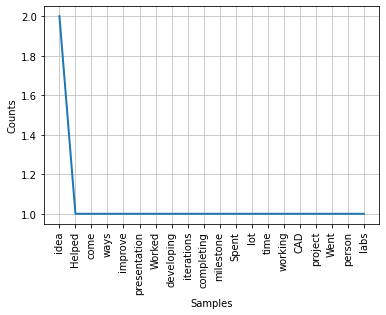

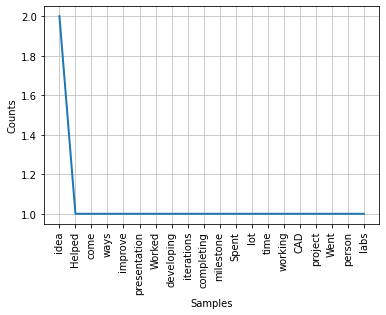

In [36]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False).figure

In [56]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
# tag parts of speech
sentence = word_tokenize(text)
pos_tag(sentence)

[('Helped', 'VBD'),
 ('come', 'VB'),
 ('up', 'RP'),
 ('with', 'IN'),
 ('ways', 'NNS'),
 ('to', 'TO'),
 ('improve', 'VB'),
 ('idea', 'NN'),
 ('and', 'CC'),
 ('presentation', 'NN'),
 ('Worked', 'VBN'),
 ('on', 'IN'),
 ('developing', 'VBG'),
 ('iterations', 'NNS'),
 ('of', 'IN'),
 ('idea', 'NN'),
 ('and', 'CC'),
 ('completing', 'VBG'),
 ('each', 'DT'),
 ('milestone', 'NN'),
 ('Spent', 'VBD'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('time', 'NN'),
 ('working', 'VBG'),
 ('on', 'IN'),
 ('CAD', 'NNP'),
 ('for', 'IN'),
 ('project', 'NN'),
 ('Went', 'NNP'),
 ('to', 'TO'),
 ('in', 'IN'),
 ('person', 'NN'),
 ('labs', 'NNS'),
 ('and', 'CC'),
 ('handled/assembled', 'VBD'),
 ('physical', 'JJ'),
 ('printouts', 'NNS'),
 ('of', 'IN'),
 ('projects', 'NNS')]

In [66]:
verbs = []
adjectives = []
for i in pos_tag(sentence):
    if 'VB' in i[1]:
        verbs.append(i)
    elif 'JJ' in i[1]:
        adjectives.append(i)

In [64]:
verbs

[('Helped', 'VBD'),
 ('come', 'VB'),
 ('improve', 'VB'),
 ('Worked', 'VBN'),
 ('developing', 'VBG'),
 ('completing', 'VBG'),
 ('Spent', 'VBD'),
 ('working', 'VBG'),
 ('handled/assembled', 'VBD')]

In [65]:
adjectives

[('physical', 'JJ')]